# Project 2 – Customer Segmentation Analysis

This notebook performs **customer segmentation** for an e-commerce / marketing dataset using clustering
(K-Means), based on the internship specification.

**Dataset:** `../data/ifood_df.csv`

**Columns detected:**
```text
['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']
```

Preview of the first 5 rows (captured at generation time):
```text
|    |   Income |   Kidhome |   Teenhome |   Recency |   MntWines |   MntFruits |   MntMeatProducts |   MntFishProducts |   MntSweetProducts |   MntGoldProds |   NumDealsPurchases |   NumWebPurchases |   NumCatalogPurchases |   NumStorePurchases |   NumWebVisitsMonth |   AcceptedCmp3 |   AcceptedCmp4 |   AcceptedCmp5 |   AcceptedCmp1 |   AcceptedCmp2 |   Complain |   Z_CostContact |   Z_Revenue |   Response |   Age |   Customer_Days |   marital_Divorced |   marital_Married |   marital_Single |   marital_Together |   marital_Widow |   education_2n Cycle |   education_Basic |   education_Graduation |   education_Master |   education_PhD |   MntTotal |   MntRegularProds |   AcceptedCmpOverall |
|---:|---------:|----------:|-----------:|----------:|-----------:|------------:|------------------:|------------------:|-------------------:|---------------:|--------------------:|------------------:|----------------------:|--------------------:|--------------------:|---------------:|---------------:|---------------:|---------------:|---------------:|-----------:|----------------:|------------:|-----------:|------:|----------------:|-------------------:|------------------:|-----------------:|-------------------:|----------------:|---------------------:|------------------:|-----------------------:|-------------------:|----------------:|-----------:|------------------:|---------------------:|
|  0 |    58138 |         0 |          0 |        58 |        635 |          88 |               546 |               172 |                 88 |             88 |                   3 |                 8 |                    10 |                   4 |                   7 |              0 |              0 |              0 |              0 |              0 |          0 |               3 |          11 |          1 |    63 |            2822 |                  0 |                 0 |                1 |                  0 |               0 |                    0 |                 0 |                      1 |                  0 |               0 |       1529 |              1441 |                    0 |
|  1 |    46344 |         1 |          1 |        38 |         11 |           1 |                 6 |                 2 |                  1 |              6 |                   2 |                 1 |                     1 |                   2 |                   5 |              0 |              0 |              0 |              0 |              0 |          0 |               3 |          11 |          0 |    66 |            2272 |                  0 |                 0 |                1 |                  0 |               0 |                    0 |                 0 |                      1 |                  0 |               0 |         21 |                15 |                    0 |
|  2 |    71613 |         0 |          0 |        26 |        426 |          49 |               127 |               111 |                 21 |             42 |                   1 |                 8 |                     2 |                  10 |                   4 |              0 |              0 |              0 |              0 |              0 |          0 |               3 |          11 |          0 |    55 |            2471 |                  0 |                 0 |                0 |                  1 |               0 |                    0 |                 0 |                      1 |                  0 |               0 |        734 |               692 |                    0 |
|  3 |    26646 |         1 |          0 |        26 |         11 |           4 |                20 |                10 |                  3 |              5 |                   2 |                 2 |                     0 |                   4 |                   6 |              0 |              0 |              0 |              0 |              0 |          0 |               3 |          11 |          0 |    36 |            2298 |                  0 |                 0 |                0 |                  1 |               0 |                    0 |                 0 |                      1 |                  0 |               0 |         48 |                43 |                    0 |
|  4 |    58293 |         1 |          0 |        94 |        173 |          43 |               118 |                46 |                 27 |             15 |                   5 |                 5 |                     3 |                   6 |                   5 |              0 |              0 |              0 |              0 |              0 |          0 |               3 |          11 |          0 |    39 |            2320 |                  0 |                 1 |                0 |                  0 |               0 |                    0 |                 0 |                      0 |                  0 |               1 |        407 |               392 |                    0 |
```

In [4]:

# === 0. Setup – Imports & Settings ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

plt.style.use("default")
sns.set()
pd.set_option("display.max_columns", None)

img_dir = os.path.join("..", "images")
os.makedirs(img_dir, exist_ok=True)


In [ ]:

# Upload dataset
try:
    from google.colab import files
except Exception:
    files = None
if files:
    uploaded = files.upload()
else:
    df = pd.read_csv("ifood_df.csv")

In [6]:

# === 2. Basic Overview & Missing Values ===
print("Data types and non-null counts:")
df.info()

print("\nDescriptive statistics (numeric):")
display(df.describe())

print("\nMissing values per column:")
display(df.isna().sum().sort_values(ascending=False))

print("\nUnique values per column:")
display(df.nunique())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   in

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000



Missing values per column:


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO


Unique values per column:


Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [7]:

# === 3. Data Cleaning & Feature Engineering ===
data = df.copy()

# Convert likely date columns
date_cols = [c for c in data.columns if "Dt" in c or "Date" in c]
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors="coerce")

# Separate numeric and categorical
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = data.select_dtypes(include=["object", "category"]).columns.tolist()

# Fill numeric NaNs with median
for col in num_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Fill categorical NaNs with mode
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Example feature: Total spending from all columns starting with 'Mnt'
spend_cols = [c for c in data.columns if c.startswith("Mnt")]
if spend_cols:
    data["Total_Spending"] = data[spend_cols].sum(axis=1)

# Example feature: number of children
if set(["Kidhome", "Teenhome"]).issubset(data.columns):
    data["NumChildren"] = data["Kidhome"] + data["Teenhome"]

print("Cleaned data info:")
data.info()


Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  Ac

C:\Users\DEVENDRA\AppData\Local\Temp\ipykernel_12300\1038825446.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\DEVENDRA\AppData\Local\Temp\ipykernel_12300\1038825446.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [8]:

# === 4. Select Features for Clustering ===
preferred_features = []

for col in ["Income", "Recency", "Total_Spending",
            "NumDealsPurchases", "NumWebPurchases",
            "NumCatalogPurchases", "NumStorePurchases"]:
    if col in data.columns:
        preferred_features.append(col)

if not preferred_features:
    num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    id_like = [c for c in num_cols if "id" in c.lower()]
    preferred_features = [c for c in num_cols if c not in id_like]

print("Features used for clustering:")
print(preferred_features)

X = data[preferred_features].copy()
display(X.head())


Features used for clustering:
['Income', 'Recency', 'Total_Spending', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']


,Income,Recency,Total_Spending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,58138.0,58,4587,3,8,10,4
1,46344.0,38,63,2,1,1,2
2,71613.0,26,2202,1,8,2,10
3,26646.0,26,144,2,2,0,4
4,58293.0,94,1221,5,5,3,6


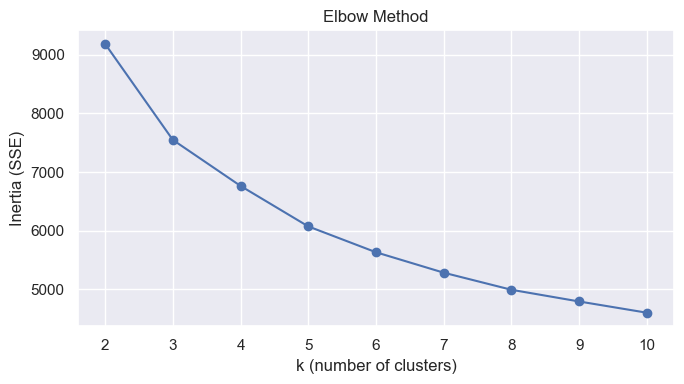

In [9]:

# === 5. Scaling & Elbow Method ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K, inertias, marker="o")
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method")
plt.xticks(K)
plt.tight_layout()
plt.savefig(os.path.join(img_dir, "elbow_method.png"))
plt.show()


In [10]:

# === 6. K-Means Clustering (default k = 4) ===
k = 4  # adjust after seeing elbow result if needed
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

data["Cluster"] = clusters.astype(int)
print(data["Cluster"].value_counts().sort_index())


Cluster
0    490
1    736
2    569
3    410
Name: count, dtype: int64


,Income,Recency,Total_Spending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Cluster,,,,,,,
0,36254.40,76.82,304.40,1.97,2.27,0.69,3.41
1,73721.10,50.14,3653.49,1.41,5.38,5.57,8.63
2,34418.38,25.49,263.41,1.89,2.12,0.57,3.31
3,54193.34,46.38,1791.90,4.96,6.74,2.62,7.16


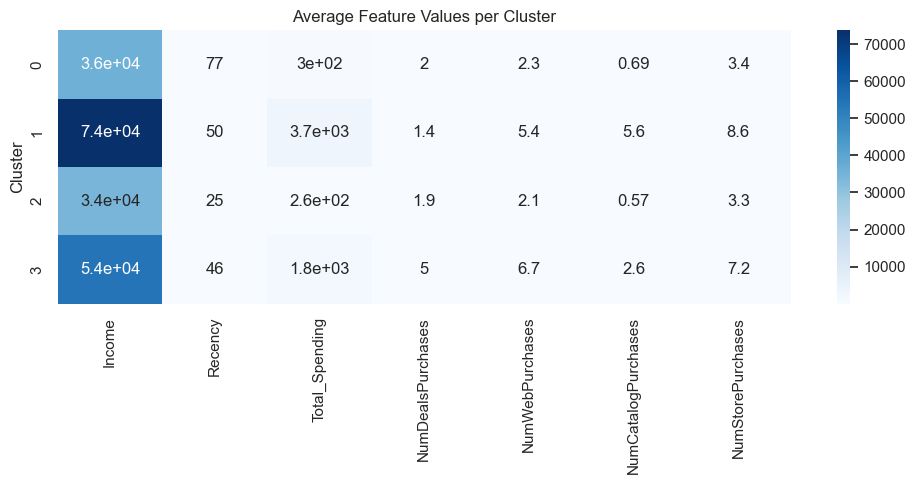

In [11]:

# === 7. Cluster Profiling ===
cluster_profile = data.groupby("Cluster")[preferred_features].mean().round(2)
display(cluster_profile)

plt.figure(figsize=(10,5))
sns.heatmap(cluster_profile, annot=True, cmap="Blues")
plt.title("Average Feature Values per Cluster")
plt.tight_layout()
plt.savefig(os.path.join(img_dir, "cluster_profile_heatmap.png"))
plt.show()


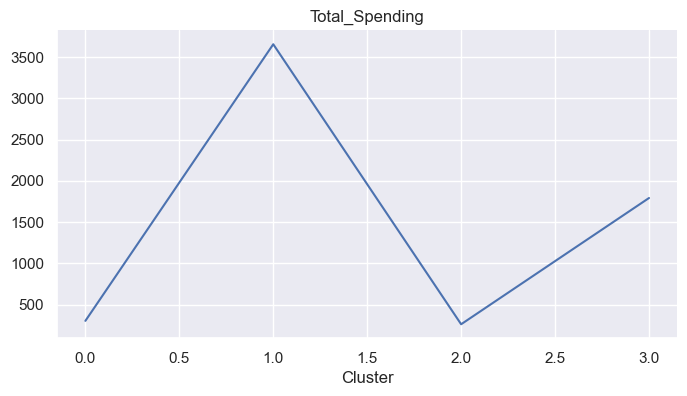

In [12]:
from matplotlib import pyplot as plt
cluster_profile['Total_Spending'].plot(kind='line', figsize=(8, 4), title='Total_Spending')
plt.gca().spines[['top', 'right']].set_visible(False)

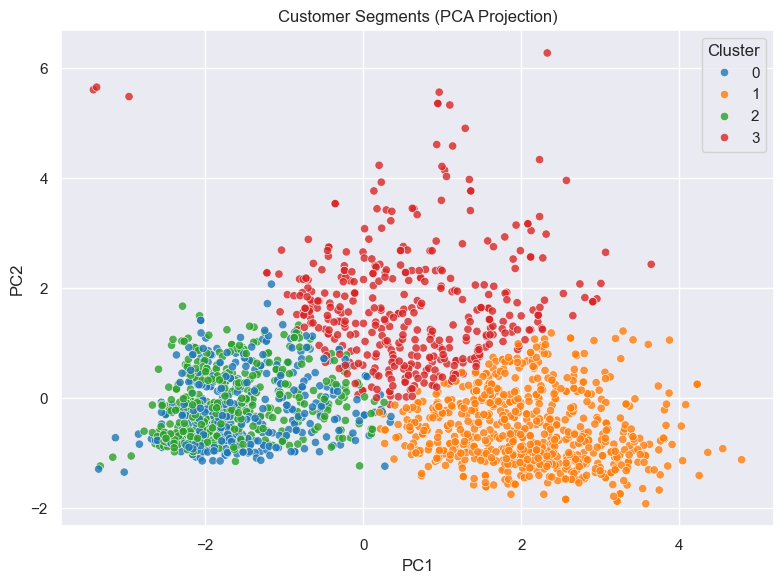

In [13]:

# === 8. Visualising Clusters with PCA (2D) ===
pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(X_scaled)

data["PC1"] = components[:,0]
data["PC2"] = components[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="PC1", y="PC2", hue="Cluster", palette="tab10", alpha=0.8)
plt.title("Customer Segments (PCA Projection)")
plt.tight_layout()
plt.savefig(os.path.join(img_dir, "pca_clusters.png"))
plt.show()


,Cluster,Total_Spending
0,0,304.402041
1,1,3653.494565
2,2,263.409490
3,3,1791.900000


C:\Users\DEVENDRA\AppData\Local\Temp\ipykernel_12300\2588380311.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spend_by_cluster, x="Cluster", y="Total_Spending", palette="viridis")


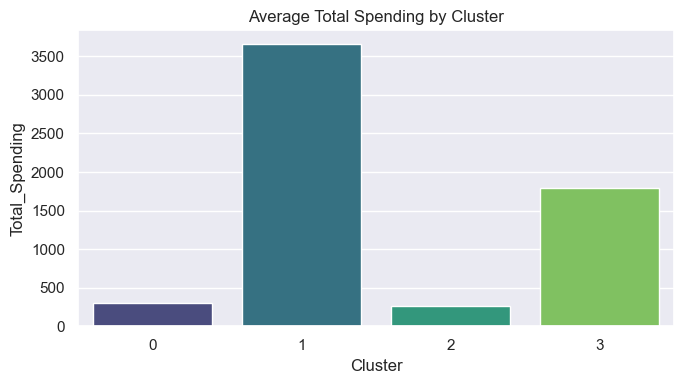

In [14]:

# === 9. Average Total Spending by Cluster (if available) ===
if "Total_Spending" in data.columns:
    spend_by_cluster = data.groupby("Cluster")["Total_Spending"].mean().reset_index()
    display(spend_by_cluster)

    plt.figure(figsize=(7,4))
    sns.barplot(data=spend_by_cluster, x="Cluster", y="Total_Spending", palette="viridis")
    plt.title("Average Total Spending by Cluster")
    plt.tight_layout()
    plt.savefig(os.path.join(img_dir, "avg_spending_by_cluster.png"))
    plt.show()


In [15]:
# === 10. Export Segmented Dataset ===
out_path = os.path.join("..", "data", "ifood_df_with_clusters.csv")

# Ensure the output directory exists
os.makedirs(os.path.dirname(out_path), exist_ok=True)

data.to_csv(out_path, index=False)
print("Saved:", out_path)

Saved: ..\data\ifood_df_with_clusters.csv


# 11. Insights & Recommendations

After running the notebook and reviewing the cluster profiles and plots, describe:

## 1. Segment Descriptions
- What characterises Cluster 0 vs Cluster 1 vs Cluster 2 vs Cluster 3?
- Which clusters have **high income / high spending**?
- Which clusters are **low-value or infrequent buyers**?
- Are there clusters more active online vs in-store (if such features exist)?

## 2. Business Actions
- Which segments should receive **loyalty rewards / premium offers**?
- Which segments need **reactivation campaigns** or discounts?
- How can the marketing team tailor **channel strategies** (email, SMS, app notifications) for each segment?